In [29]:
from keras.datasets import imdb
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data from keras datasets

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
#Example to decode a coded review in english words

word_index = imdb.get_word_index()

# Dictionary that associate number with words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# For each number encountered in train_data[0], we map the number with a word (via the dictionary reverse_word_index) 

def decode_review(review):

    decoded_review = []
    for num in review:
        decoded_review.append(reverse_word_index.get(num - 3, '?'))
    decoded_review = ' '.join(decoded_review)

    return decoded_review

# Encoded review
print(train_data[0])
# Decoded review
decoded_review = decode_review(train_data[0])
print(decoded_review)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
? this film was just brilliant casting location scenery stor

In [4]:
# Data pre-processing in order to be used by a neural network

# Encoding integer sequences in a binary matrix
def vectorize_sequence(sequences, dimension = 10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

# Train data vectorization
x_train = vectorize_sequence(train_data)

# Test data vectorization
x_test = vectorize_sequence(test_data)

# Labels vectorization
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
# Build the model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# Compile the model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val =  y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
# Model training
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5448 - accuracy: 0.7675 - val_loss: 0.4376 - val_accuracy: 0.8198
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3424 - accuracy: 0.8894 - val_loss: 0.3748 - val_accuracy: 0.8462
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2554 - accuracy: 0.9182 - val_loss: 0.2922 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2036 - accuracy: 0.9362 - val_loss: 0.2800 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1744 - accuracy: 0.9445 - val_loss: 0.2784 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1441 - accuracy: 0.9551 - val_loss: 0.2844 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1224 - accuracy: 0.9629 - val_loss: 0.3201 - val_accuracy: 0.8751
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


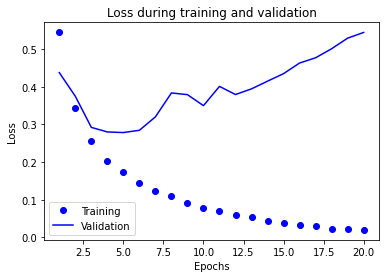

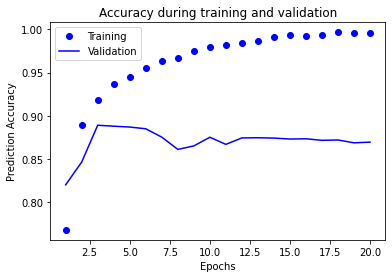

In [9]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training')

plt.plot(epochs, val_loss_values, 'b', label='Validation')

plt.title('Loss during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training')
plt.plot(epochs,val_acc_values, 'b', label='Validation')
plt.title('Accuracy during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Prediction Accuracy')
plt.legend()

plt.show()

In [10]:
# Optimize the model reducing the number of epochs to avoid overfitting + display the evaluation of the model

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1998 - accuracy: 0.9472
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1374 - accuracy: 0.9579
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1079 - accuracy: 0.9671
Epoch 4/4
782/782 [==============================] - 1s 891us/step - loss: 0.4528 - accuracy: 0.8645
[0.45277905464172363, 0.8645200133323669]


In [13]:
model.predict(x_test)

782/782 [==============================] - 1s 722us/step


array([[0.01455054],
       [0.9999026 ],
       [0.42471635],
       ...,
       [0.0337789 ],
       [0.01929015],
       [0.89676774]], dtype=float32)

In [72]:
# Making predictions on the train dataset, 0 for negative review, 1 for positive review

def predict_reviews(train_data, x_train, y_train, num_reviews):

    for index in range(0, num_reviews):
        decoded_review = decode_review(train_data[index])
        print(decoded_review)

        prediction = model.predict(np.expand_dims(x_train[index], axis=0))
        
        print(f'Prediction --> {prediction[0][0]}')
        print(f'Actual label --> {y_train[index]}')
    
        if(prediction[0][0] >= 0.5):
            print('This review is positive')
        else:
            print('This review is negative')
        print('')

movies_to_review = 5
predict_reviews(train_data, x_train, y_train, movies_to_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi